# Benchmark Results Visualization

## Text models Performance, depending on Conversation Length

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# reading logs data

class Results:
    
    def __init__(self, train_log_url, eval_log_url):

        # importing train log data
        with open(train_log_url) as f:
            lines = f.readlines()
            self.optimizer = lines[0]
            self.batch_size = int(lines[2])
            self.conv_length = int(lines[4])
            self.train_accuracy = float(lines[6])
            self.train_f1_weighted = float(lines[8])
            self.val_accuracy = float(lines[10])
            self.val_f1_weighted = float(lines[12])
            self.train_time = float(lines[14])

        # importing evalusation data
        with open(eval_log_url) as f:
            lines = f.readlines()
            self.val_f1_all = np.array(lines[1].replace('[','').replace(']','').split()).astype(float) 
            self.val_f1_macro = float(lines[3].strip())
            self.val_f1_weighted = float(lines[5].strip())
            self.test_f1_all = np.array(lines[7].replace('[','').replace(']','').split()).astype(float)
            self.test_f1_macro = float(lines[9].strip())
            self.test_f1_weighted = float(lines[11].strip())
            self.test_prediction_time = float(lines[13].strip())
    
    def __str__(self):
        return str(vars(res))


albert_results = [Results(train_log_url = f'./results/text/ALBERT/logs/log_conv{i}_TextTransformer_s42.txt',
    eval_log_url=f'./results/text/ALBERT/logs/log_conv{i}_TextTransformer_s42_results.txt') for i in range(1,5)]

text_bilstm_results = [Results(train_log_url = f'./results/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42.txt',
    eval_log_url=f'./results/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42_results.txt') for i in range(1,5)]

### F1

#### F1 by class

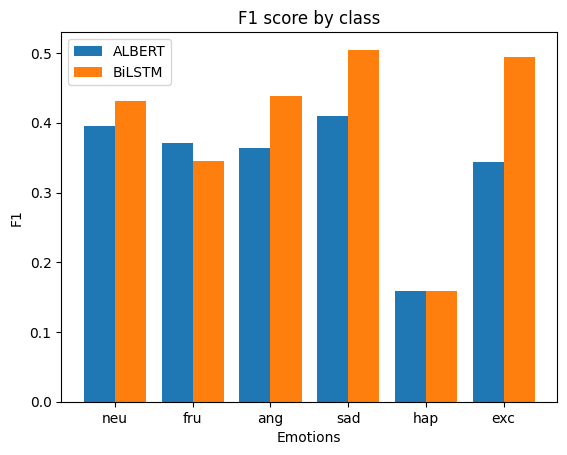

In [2]:
## f1 values by class
# are these the ones we are considering?
label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']
albert_f1_byclass = albert_results[3].test_f1_all[:6]
text_bilstm_f1_byclass = text_bilstm_results[3].test_f1_all[:6] 

  
X_axis = np.arange(len(label2id))
  
plt.bar(X_axis - 0.2, albert_f1_byclass, 0.4, label = 'ALBERT')
plt.bar(X_axis + 0.2, text_bilstm_f1_byclass, 0.4, label = 'BiLSTM')
  
plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.title("F1 score by class")
plt.legend()
plt.show()

#### F1 weighted

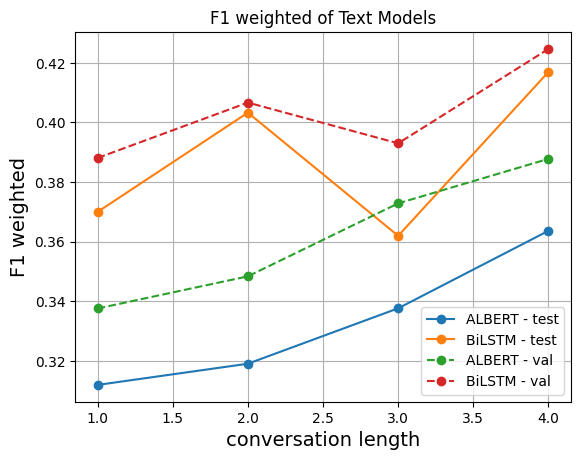

In [3]:
albert_f1_weighted_test = [i.test_f1_weighted for i in albert_results]
text_bilstm_f1_weighted_test = [i.test_f1_weighted for i in text_bilstm_results]
albert_f1_weighted_val = [i.val_f1_weighted for i in albert_results]
text_bilstm_f1_weighted_val = [i.val_f1_weighted for i in text_bilstm_results]
albert_convlen = [i.conv_length for i in albert_results]

## F1 weighted depending on conversation length
plt.plot(albert_convlen, albert_f1_weighted_test, marker='o', label='ALBERT - test')
plt.plot(albert_convlen, text_bilstm_f1_weighted_test, marker='o', label='BiLSTM - test')
plt.plot(albert_convlen, albert_f1_weighted_val, linestyle='--', marker='o', label='ALBERT - val')
plt.plot(albert_convlen, text_bilstm_f1_weighted_val, linestyle='--', marker='o', label='BiLSTM - val')
plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Text Models')
plt.grid()
plt.legend()
plt.show()


### Accuracy

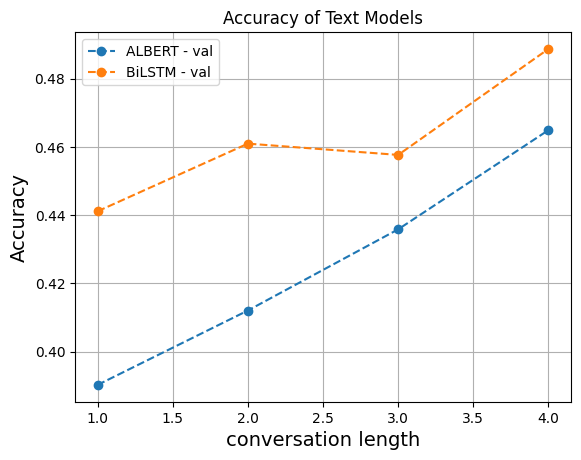

In [4]:
#albert_results_accuracy_test = [i.test_accuracy for i in albert_results]
#text_bilstm_results_accuracy_test = [i.test_accuracy for i in text_bilstm_results]
albert_accuracy_val = [i.val_accuracy for i in albert_results]
text_bilstm_accuracy_val = [i.val_accuracy for i in text_bilstm_results]
albert_results_convlen = [i.conv_length for i in albert_results]


## accuracy depending on conversation length
#plt.plot(albert_results_convlen, albert_results_accuracy_test, label='ALBERT - test')
#plt.plot(albert_results_convlen, text_bilstm_results_accuracy_test , label='BiLSTM - test')
plt.plot(albert_results_convlen, albert_accuracy_val, linestyle='--',marker='o', label='ALBERT - val')
plt.plot(albert_results_convlen, text_bilstm_accuracy_val, linestyle='--', marker='o', label='BiLSTM - val')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Accuracy of Text Models')
plt.grid()
plt.legend()
plt.show()


### Training Time

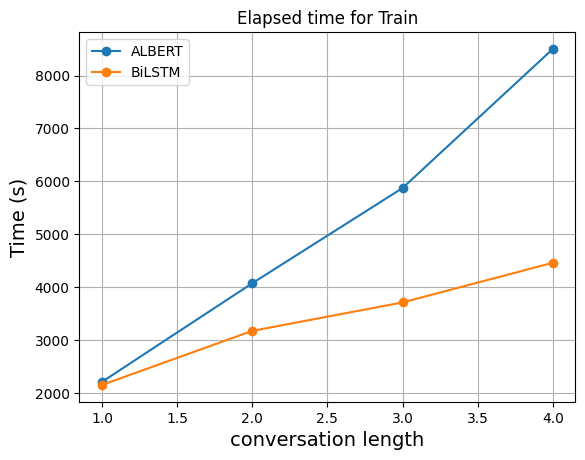

In [5]:
# train time
albert_train_time = [i.train_time for i in albert_results]
text_bilstm_train_time = [i.train_time for i in text_bilstm_results]

# prediction time
albert_eval_time = [i.test_prediction_time for i in albert_results]
text_bilstm_eval_time = [i.test_prediction_time for i in text_bilstm_results]

albert_results_convlen = [i.conv_length for i in albert_results]

## Elapsed time (s) depending on conversation length

plt.plot(albert_results_convlen, albert_train_time, linestyle='-', marker='o', label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_train_time, linestyle='-', marker='o', label='BiLSTM')
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Train')
plt.grid()
plt.legend()
plt.show()


### Inference Time

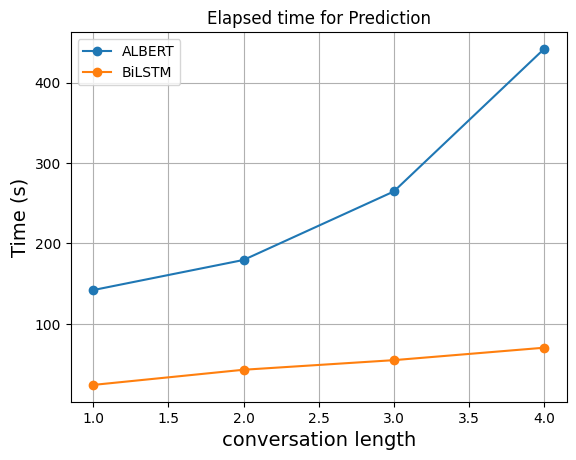

In [6]:
plt.plot(albert_results_convlen, albert_eval_time, marker='o', label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_eval_time, marker='o', label='BiLSTM')
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Prediction')
plt.grid()
plt.legend()
plt.show()

## Audio models Performance, depending on Conversation Length

### F1

#### F1 by class

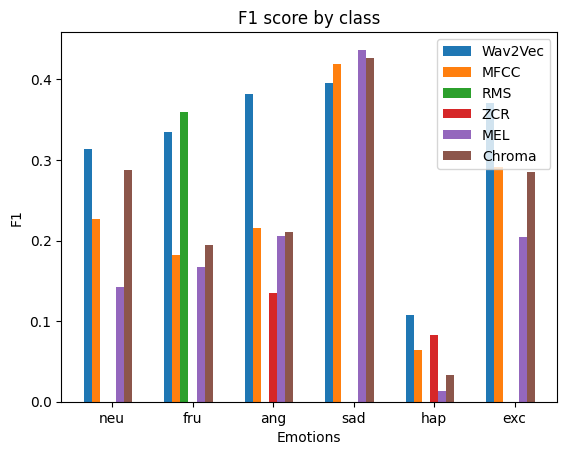

In [7]:
## barplot con f1 per classe
## f1 values by class
# are these the ones we are considering?
wav2vec_results = [Results(train_log_url = f'./results/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s42.txt',
    eval_log_url=f'./results/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s42_results.txt') for i in range(1,4)]

mfcc_results = [Results(train_log_url = f'./results/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s42_results.txt') for i in range(1,6)]

rms_results = [Results(train_log_url = f'./results/audio/LiteModel/rms/log/log_conv{i}_SimpleAudioModel_rms_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/rms/log/log_conv{i}_SimpleAudioModel_rms_s42_results.txt') for i in range(1,6)]

zcr_results = [Results(train_log_url = f'./results/audio/LiteModel/zcr/log/log_conv{i}_SimpleAudioModel_zcr_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/zcr/log/log_conv{i}_SimpleAudioModel_zcr_s42_results.txt') for i in range(1,6)]

mel_results = [Results(train_log_url = f'./results/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s42_results.txt') for i in range(1,6)]

chroma_results = [Results(train_log_url = f'./results/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s42_results.txt') for i in range(1,6)]



label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']

wav2vec_f1_byclass = wav2vec_results[2].test_f1_all[:6]
mfcc_f1_byclass = mfcc_results[2].test_f1_all[:6]
rms_f1_byclass = rms_results[2].test_f1_all[:6]
zcr_f1_byclass = zcr_results[2].test_f1_all[:6]
mel_f1_byclass = mel_results[2].test_f1_all[:6]
chroma_f1_byclass = chroma_results[2].test_f1_all[:6]
#print(wav2vec_f1_byclass)
#print(mfcc_f1_byclass)
#print(rms_f1_byclass)
#print(zcr_f1_byclass)

  
X_axis = np.arange(len(label2id))
  
plt.bar(X_axis - 0.3, wav2vec_f1_byclass, 0.1, label = 'Wav2Vec')
plt.bar(X_axis - 0.2, mfcc_f1_byclass, 0.1, label = 'MFCC')
plt.bar(X_axis - 0.1, rms_f1_byclass, 0.1, label = 'RMS')
plt.bar(X_axis - 0.0, zcr_f1_byclass, 0.1, label = 'ZCR')
plt.bar(X_axis + 0.1, mel_f1_byclass, 0.1, label = 'MEL')
plt.bar(X_axis + 0.2, chroma_f1_byclass, 0.1, label = 'Chroma')
  
plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.title("F1 score by class")
plt.legend()
plt.show()

#### F1 Weighted

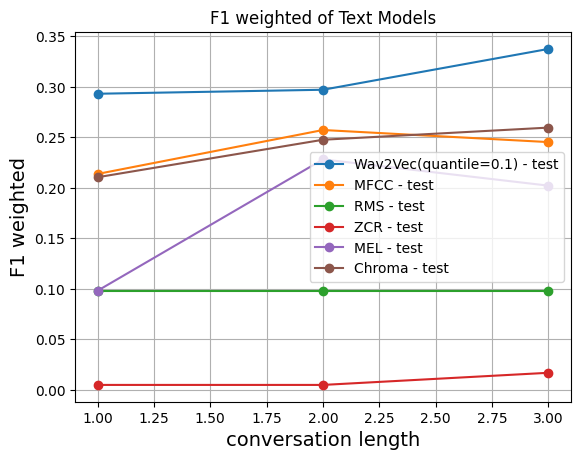

In [8]:
wav2vec_convlen = [i.conv_length for i in wav2vec_results]
wav2vec_f1_weighted_test = [i.test_f1_weighted for i in wav2vec_results]
mfcc_f1_weighted_test = [i.test_f1_weighted for i in mfcc_results][:3]
rms_f1_weighted_test = [i.test_f1_weighted for i in rms_results][:3]
zcr_f1_weighted_test = [i.test_f1_weighted for i in zcr_results][:3]
mel_f1_weighted_test = [i.test_f1_weighted for i in mel_results][:3]
chroma_f1_weighted_test = [i.test_f1_weighted for i in chroma_results][:3]


## F1 weighted depending on conversation length
plt.plot(wav2vec_convlen, wav2vec_f1_weighted_test, marker='o', label='Wav2Vec(quantile=0.1) - test')
plt.plot(wav2vec_convlen, mfcc_f1_weighted_test, marker='o', label='MFCC - test')
plt.plot(wav2vec_convlen, rms_f1_weighted_test, marker='o', label='RMS - test')
plt.plot(wav2vec_convlen, zcr_f1_weighted_test, marker='o', label='ZCR - test')
plt.plot(wav2vec_convlen, mel_f1_weighted_test, marker='o', label='MEL - test')
plt.plot(wav2vec_convlen, chroma_f1_weighted_test, marker='o', label='Chroma - test')


plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Text Models')
plt.grid()
plt.legend()
plt.show()

### Accuracy

### Training Time

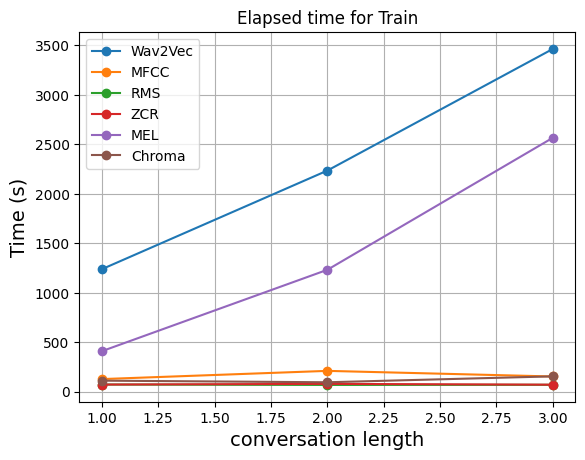

In [9]:
# train time
wav2vec_train_time = [i.train_time for i in wav2vec_results]
mfcc_train_time = [i.train_time for i in mfcc_results][:3]
rms_train_time = [i.train_time for i in rms_results][:3]
zcr_train_time = [i.train_time for i in zcr_results][:3]
mel_train_time = [i.train_time for i in mel_results][:3]
chroma_train_time = [i.train_time for i in chroma_results][:3]

wav2vec_convlen = [i.conv_length for i in wav2vec_results]
## Elapsed time (s) depending on conversation length

plt.plot(wav2vec_convlen, wav2vec_train_time, marker='o', label='Wav2Vec')
plt.plot(wav2vec_convlen, mfcc_train_time, marker='o', label='MFCC')
plt.plot(wav2vec_convlen, rms_train_time, marker='o', label='RMS')
plt.plot(wav2vec_convlen, zcr_train_time, marker='o', label='ZCR')
plt.plot(wav2vec_convlen, mel_train_time, marker='o', label='MEL')
plt.plot(wav2vec_convlen, chroma_train_time, marker='o', label='Chroma')

plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Train')
plt.grid()
plt.legend()
plt.show()

### Inference Time

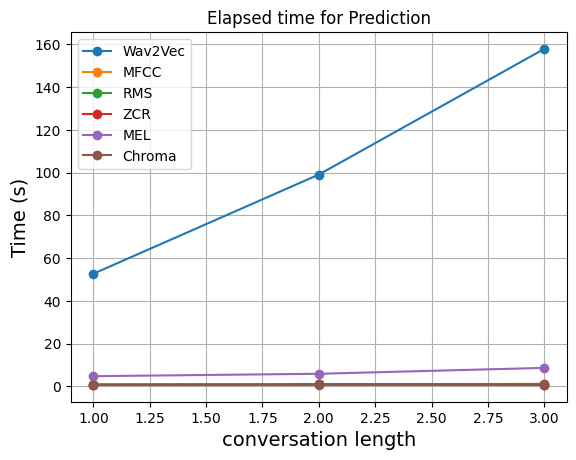

In [10]:
# train time
wav2vec_train_time = [i.test_prediction_time for i in wav2vec_results]
mfcc_train_time = [i.test_prediction_time for i in mfcc_results][:3]
rms_train_time = [i.test_prediction_time for i in rms_results][:3]
zcr_train_time = [i.test_prediction_time for i in zcr_results][:3]
mel_train_time = [i.test_prediction_time for i in mel_results][:3]
chroma_train_time = [i.test_prediction_time for i in chroma_results][:3]

wav2vec_convlen = [i.conv_length for i in wav2vec_results]
## Elapsed time (s) depending on conversation length

plt.plot(wav2vec_convlen, wav2vec_train_time, marker='o', label='Wav2Vec')
plt.plot(wav2vec_convlen, mfcc_train_time, marker='o', label='MFCC')
plt.plot(wav2vec_convlen, rms_train_time, marker='o', label='RMS')
plt.plot(wav2vec_convlen, zcr_train_time, marker='o', label='ZCR')
plt.plot(wav2vec_convlen, mel_train_time, marker='o', label='MEL')
plt.plot(wav2vec_convlen, chroma_train_time, marker='o', label='Chroma')

plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Prediction')
plt.grid()
plt.legend()
plt.show()

### Wav2Vec Performance, depending on quantile

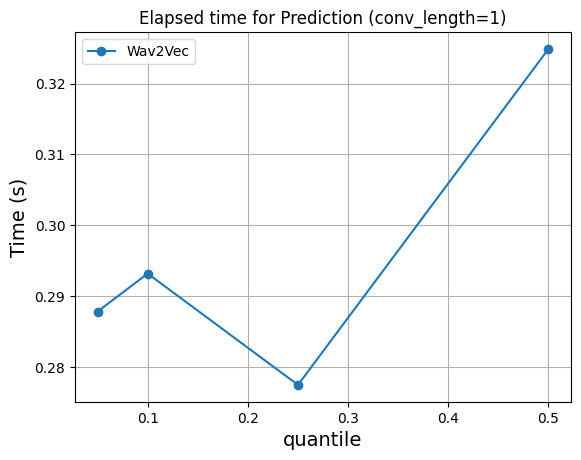

In [20]:
quantiles = [0.05,0.1,0.25,0.5]
wav2vec_results_quantiles = [Results(train_log_url = f'./results/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s42.txt',
    eval_log_url=f'./results/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s42_results.txt') for i in quantiles]

wav2vec_results_quantiles_f1_test = [i.test_f1_weighted  for i in wav2vec_results_quantiles]
wav2vec_results_quantiles_f1 = [i.test_f1_weighted  for i in wav2vec_results_quantiles]

plt.plot(quantiles, wav2vec_results_quantiles_f1, marker='o', label='Wav2Vec')

plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('quantile', fontsize=14)
plt.title('Elapsed time for Prediction (conv_length=1)')
plt.grid()
plt.legend()
plt.show()